In [1]:
import pandas as pd

### 시리즈 = 값 + 인덱스
s = pd.Series([], index = [])
s.index
s.values
s.name = '데이터 이름'
s.index.name = '인덱스 이름'

In [2]:
s = pd.Series([2222,3333,4444,5555],
              index = ['a', 'b', 'c', 'd'])
print(s)

a    2222
b    3333
c    4444
d    5555
dtype: int64


In [3]:
print(s.index)
print(s.values)

Index(['a', 'b', 'c', 'd'], dtype='object')
[2222 3333 4444 5555]


In [4]:
s.name = '숫자들'
s.index.name = '알파벳'
print(s)

알파벳
a    2222
b    3333
c    4444
d    5555
Name: 숫자들, dtype: int64


### 시리즈 연산
연산해도 인덱스는 안 바뀜

In [5]:
s / 10000

알파벳
a    0.2222
b    0.3333
c    0.4444
d    0.5555
Name: 숫자들, dtype: float64

### 시리즈 인덱싱


In [6]:
print(s[1])
print(s['b'])
s[1], s["b"]

3333
3333


C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\342593104.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s[1])
C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\342593104.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[1], s["b"]


(np.int64(3333), np.int64(3333))

In [7]:
print(s[[0, 3, 1]])
print(s[['a', 'c', 'b']])

알파벳
a    2222
d    5555
b    3333
Name: 숫자들, dtype: int64
알파벳
a    2222
c    4444
b    3333
Name: 숫자들, dtype: int64


C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1965467850.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s[[0, 3, 1]])


In [8]:
print(s[1:3])
print(s['b':'d'])

알파벳
b    3333
c    4444
Name: 숫자들, dtype: int64
알파벳
b    3333
c    4444
d    5555
Name: 숫자들, dtype: int64


In [9]:
print(s.a)
print(s.b)
print(s.c)

2222
3333
4444


### 시리즈와 딕셔너리 자료형
둘이 비슷하다.
- in 연산
- items 메서드
- for 루프

를 통해 key와 value에 접근 가능

In [10]:
'a' in s

True

In [11]:
'k' in s

False

In [12]:
l = list(s.items())
print(l)
for k, v in s.items():
    print('%s = %d' % (k, v))

[('a', 2222), ('b', 3333), ('c', 4444), ('d', 5555)]
a = 2222
b = 3333
c = 4444
d = 5555


#### 딕셔너리 객체에서 시리즈 만들기
딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다. 
만약 순서를 정하고 싶다면 인덱스를 리스트로 지정해야 한다.

In [13]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [14]:
s2 = pd.Series({"서울": 9631482, "부산": 3393191, "인천": 2632035, "대전": 1490158},
               index=["인천", "부산", "서울", "대전"])
s2 # 순서를 지정함


인천    2632035
부산    3393191
서울    9631482
대전    1490158
dtype: int64

### 인덱스 기반 연산
두 시리즈에 대해 연산을 하는 경우 인덱스가 같은 데이터끼리 연산
notnull()

In [15]:
s2 = pd.Series({"a": 9631482, "b": 3393191, "c": 2632035, "d": 1490158, "e": 389724})
ds = s - s2
print(ds)

a   -9629260.0
b   -3389858.0
c   -2627591.0
d   -1484603.0
e          NaN
dtype: float64


In [16]:
print(ds.notnull())
print(ds[ds.notnull()])

a     True
b     True
c     True
d     True
e    False
dtype: bool
a   -9629260.0
b   -3389858.0
c   -2627591.0
d   -1484603.0
dtype: float64


### 데이터 갱신, 추가, 삭제
인덱싱 이용

In [17]:
ds['a'] = 1345
print(ds)

a       1345.0
b   -3389858.0
c   -2627591.0
d   -1484603.0
e          NaN
dtype: float64


In [18]:
ds['k'] = 1234
print(ds)

a       1345.0
b   -3389858.0
c   -2627591.0
d   -1484603.0
e          NaN
k       1234.0
dtype: float64


In [19]:
del ds['k']
print(ds)

a       1345.0
b   -3389858.0
c   -2627591.0
d   -1484603.0
e          NaN
dtype: float64


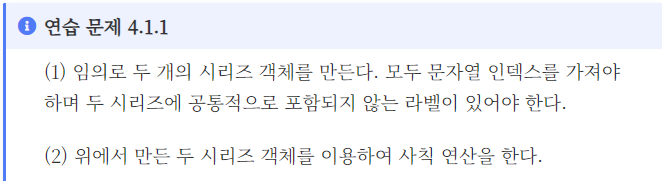

In [20]:
s1 = pd.Series([11,22,33,44],
               index = ['a', 'b', 'c', 'd'])
s2 = pd.Series([111, 222, 333, 444],
               index = ['a', 'b', 'c', 'e'])

print(s1 - s2)

a   -100.0
b   -200.0
c   -300.0
d      NaN
e      NaN
dtype: float64


# 데이터프레임 클래스
df = pd.DataFrame(data, index=index, columns=columns)

df.vaules

df.columns

df.index

df.T

- 넘파이 2차원 배열이 가지는 대부분 메서드 다 가능

In [21]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
print(df)

     지역     2015     2010     2005     2000  2010-2015 증가율
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


In [22]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [23]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [24]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [25]:
df.index.name = '도시'
df.columns.name = '특성'
print(df)

특성   지역     2015     2010     2005     2000  2010-2015 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


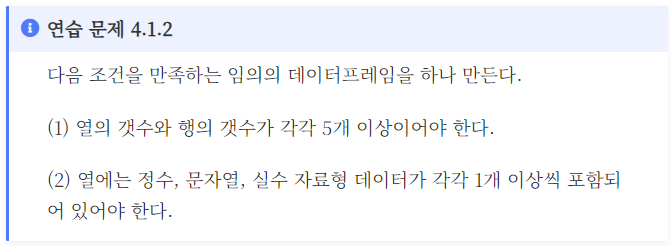

In [26]:
data = {"a" : [1, 2, 3, 4, 5],
        'b' : [6, 7, 8, 9, 10],
        'c' : [11, 12, 13, 14, 15],
        'd' : [16, 17, 18, 19, 20],
        'e' : [21, 22, 23, 24, 25]}
col = ['a', 'b', 'c', 'd', 'e']
idx = ['aa', 'bb', 'cc', 'dd', 'ee']

df1 = pd.DataFrame(data, index=idx, columns=col)
print(df1)

    a   b   c   d   e
aa  1   6  11  16  21
bb  2   7  12  17  22
cc  3   8  13  18  23
dd  4   9  14  19  24
ee  5  10  15  20  25


### 열 데이터의 갱신, 추가, 삭제
열 단위로 갱신, 추가, 삭제 가능

In [27]:
# "2010-2015 증가율"이라는 이름의 열 추가
df["2010-2015 증가율"] = df["2010-2015 증가율"] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [28]:
# "2005-2010 증가율"이라는 이름의 열 추가
df["2005-2010 증가율"] = ((df["2010"] - df["2005"]) / df["2005"] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [29]:
# "2010-2015 증가율"이라는 이름의 열 삭제
del df["2010-2015 증가율"]
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


### 열 인덱싱
열 라벨을 키값으로 생각하고 인덱싱

라벨 값을 하나만 넣으면 시리즈 객체로 반환

배열 또는 리스트로 넣으면 부분적인 데이터프레임 반환

열 인덱스가 문자열이면 정수 인덱싱 불가능

In [30]:
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [31]:
df[['2010', '2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [32]:
# 2010이라는 열을 반환하면서 데이터프레임 자료형을 유지
df[["2010"]]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [33]:
# 2010이라는 열을 반환하면서 시리즈 자료형으로 변환
df["2010"]

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

### 행 인덱싱
슬라이싱 해야됨


In [34]:
df[:1]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [35]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [36]:
df[1:3]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54


In [37]:
df['서울':'부산']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40


### 개별 데이터 슬라이싱
열 라벨로 시리즈 인덱싱 + 행 라벨로 인덱싱

In [38]:
print(df['2015']['서울'])

9904312


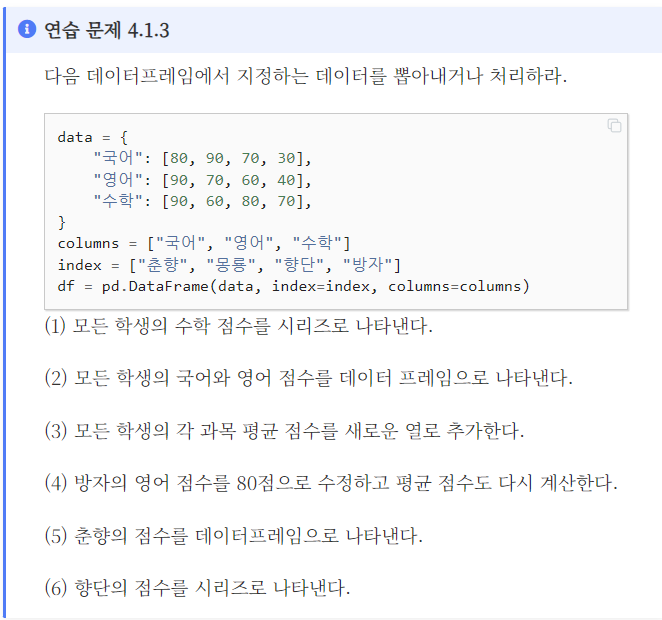

In [39]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

    국어  영어  수학
춘향  80  90  90
몽룡  90  70  60
향단  70  60  80
방자  30  40  70


In [40]:
#(1)
df.values

array([[80, 90, 90],
       [90, 70, 60],
       [70, 60, 80],
       [30, 40, 70]])

In [41]:
#(2)
df[['국어','영어']]

,국어,영어
춘향,80,90
몽룡,90,70
향단,70,60
방자,30,40


In [42]:
#(3)
df['평균'] = (df['국어'] + df['수학'] + df['영어']) / 3
df

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,40,70,46.666667


In [43]:
#(4)
df['영어']['방자'] = 80
df['평균'] = (df['국어'] + df['수학'] + df['영어']) / 3
df


C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\969767178.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['영어']['방자'] = 80
C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\969767178.py:2: SettingWithCopyWarning: 
A value is trying to

,국어,영어,수학,평균
춘향,80,90,90,86.666667
몽룡,90,70,60,73.333333
향단,70,60,80,70.000000
방자,30,80,70,60.000000


In [44]:
#(5)
df[:1]

,국어,영어,수학,평균
춘향,80,90,90,86.666667


In [45]:
#(6)
df2 = pd.Series([df[2:3]])
print(df2)


0        국어  영어  수학    평균
향단  70  60  80  70.0
dtype: object


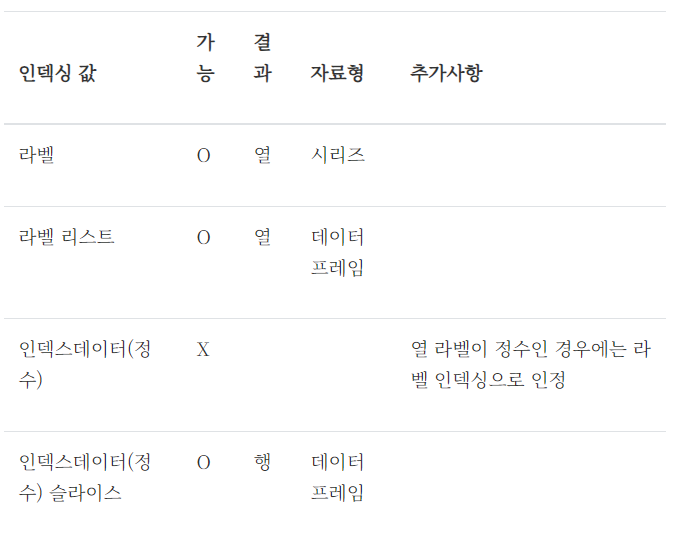

# 4.2 데이터 입출력

### %%writefile 명령
셀에 서술한 내용대로 텍스트 파일을 만드는 명령

In [46]:
%%writefile sample1.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample1.csv


### CSV 파일 입력
CSV 파일로부터 데이터를 읽어 데이터프레임을 만들 때는 pandas.read_csv 함수를 사용한다. 함수의 입력값으로 파일 이름을 넣는다.

In [47]:
pd.read_csv('sample1.csv')

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


데이터 파일에 열 인덱스 정보가 없는 경우에는 read_csv 명령의 names 인수로 설정할 수 있다.

In [48]:
%%writefile sample2.csv
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample2.csv


In [49]:
pd.read_csv('sample2.csv', names=['c1', 'c2', 'c3'])

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


만약 테이블 내의 특정한 열을 행 인덱스로 지정하고 싶으면 index_col 인수를 사용한다.

In [50]:
pd.read_csv('sample1.csv', index_col='c1')

,c2,c3
c1,,
1,1.11,one
2,2.22,two
3,3.33,three


확장자가 CSV가 아닌 파일 즉, 데이터를 구분하는 구분자(separator)가 쉼표(comma)가 아니면 sep 인수를 써서 구분자를 사용자가 지정해준다. 

만약 길이가 정해지지 않은 공백이 구분자인 경우에는 \s+ 정규식(regular expression) 문자열을 사용한다.

In [51]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample3.txt


In [52]:
pd.read_table('sample3.txt', sep='\s+')     # read_table

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2471732004.py:1: SyntaxWarning: invalid escape sequence '\s'
  pd.read_table('sample3.txt', sep='\s+')     # read_table


,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


만약 자료 파일 중에 건너 뛰어야 할 행이 있으면 skiprows 인수를 사용한다.

In [53]:
%%writefile sample4.txt
파일 제목: sample4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample4.txt


In [54]:
pd.read_csv('sample4.txt', skiprows=[0, 1])

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


특정한 값을 NaN으로 취급하고 싶으면 na_values 인수에 NaN 값으로 취급할 값을 넣는다.

In [55]:
%%writefile sample5.csv
c1, c2, c3
1, 1.11, one
2, , two
누락, 3.33, three

Overwriting sample5.csv


In [56]:
df = pd.read_csv('sample5.csv', na_values=['누락'])
df

,c1,c2,c3
0,1.0,1.11,one
1,2.0,,two
2,NaN,3.33,three


### CSV 파일 출력
파이썬의 데이터프레임 값을 CSV 파일로 출력하고 싶으면 to_csv 메서드를 사용

In [57]:
df.to_csv('sample6.csv')

In [58]:
!type sample6.csv   # 파일 내용 확인

,c1, c2, c3
0,1.0, 1.11, one
1,2.0, , two
2,, 3.33, three



sample6.csv


The system cannot find the file specified.
Error occurred while processing: #.
The system cannot find the file specified.
Error occurred while processing: 파일.
The system cannot find the file specified.
Error occurred while processing: 내용.
The system cannot find the file specified.
Error occurred while processing: 확인.


 sep 인수로 구분자를 바꿀 수 있다.

In [59]:
df.to_csv('sample7.txt', sep='|')

In [60]:
!type sample7.txt

|c1| c2| c3
0|1.0| 1.11| one
1|2.0| | two
2|| 3.33| three


na_rep 인수로 NaN 표시값을 바꿀 수도 있다.

In [61]:
df.to_csv('sample8.csv', na_rep='누락')

In [62]:
!type sample8.csv

,c1, c2, c3
0,1.0, 1.11, one
1,2.0, , two
2,누락, 3.33, three


index, header 인수를 지정하여 인덱스 및 헤더 출력 여부를 지정

In [63]:
df.index = ["a", "b", "c"]
df

,c1,c2,c3
a,1.0,1.11,one
b,2.0,,two
c,NaN,3.33,three


In [64]:
df.to_csv('sample9.csv', index=False, header=False)
!type sample6.csv

,c1, c2, c3
0,1.0, 1.11, one
1,2.0, , two
2,, 3.33, three


### 인터넷 상의 CSV 파일 입력
read_csv 명령 사용시 파일 패스 대신 URL을 지정하면 Pandas가 직접 해당 파일을 다운로드하여 읽어들인다. 

다음은 저자의 github 웹사이트에 저장되어 있는 데이터 파일을 원격으로 읽는 명령이다.

In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")

보여줄 행의 수는 display.max_rows 옵션으로 정할 수 있다.

만약 앞이나 뒤의 특정 개수만 보고 싶다면 head 메서드나 tail 메서드를 이용한다. 

In [66]:
pd.set_option("display.max_rows", 20)  # 앞뒤로 모두 20행만 보여준다.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 인터넷 상의 데이터 베이스 자료 입력

In [69]:
import datetime
dt_start = datetime.datetime(2015, 1, 1)
dt_end = "2016, 6, 30"

In [70]:
import pandas_datareader as pdr

gdp = pdr.get_data_fred('GDP', dt_start, dt_end)
gdp.tail()

ModuleNotFoundError: No module named 'pandas_datareader'

# 4.3 데이터프레임 고급 인덱싱
데이터프레임에서 특정한 데이터만 골라내는 것을 인덱싱(indexing)이라고 한다.

Pandas는 numpy행렬과 같이 쉼표를 사용한 (행 인덱스, 열 인덱스) 형식의 2차원 인덱싱을 지원하기 위해 다음과 같은 특별한 인덱서(indexer) 속성도 제공한다.

loc : 라벨값 기반의 2차원 인덱싱

iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱

### loc 인덱서
df.loc[행 인덱싱 값]

df.loc[행 인덱싱 값, 열 인덱싱 값]

이 때 인덱싱 값은 다음 중 하나이다. 

행 인덱싱값은 정수 또는 행 인덱스데이터이고 

열 인덱싱값은 라벨 문자열이다.

- 인덱스데이터

- 인덱스데이터 슬라이스

- 인덱스데이터 리스트

- 같은 행 인덱스를 가지는 불리언 시리즈 (행 인덱싱의 경우)

- 또는 위의 값들을 반환하는 함수

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


### 인덱싱 값을 하나만 받는 경우
loc 인덱서를 사용하면서 인덱스를 하나만 넣으면 행을 선택

인덱스데이터가 “a”인 행을 고르면 해당하는 행이 시리즈로 출력된다. 시리즈라서 상하로 길게 출력되기는 했지만 행을 가져오고 있다.

In [ ]:
df.loc["a"]

A    10
B    11
C    12
D    13
Name: a, dtype: int64

In [ ]:
df.loc["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [ ]:
df["b":"c"]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [ ]:
df.loc[["b", "c"]]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [ ]:
df.A > 15

a    False
b    False
c     True
Name: A, dtype: bool

In [ ]:
df.loc[df.A > 15]

,A,B,C,D
c,18,19,20,21


인덱스 대신 인덱스 값을 반환하는 함수를 사용할 수도 있다. 다음 함수는 A열의 값이 12보다 큰 행만 선택한다.

In [ ]:
def select_rows(df):
    return df.A > 15

In [ ]:
select_rows(df)

a    False
b    False
c     True
Name: A, dtype: bool

In [ ]:
df.loc[select_rows(df)]

,A,B,C,D
c,18,19,20,21


원래 (행) 인덱스값이 정수인 경우에는 슬라이싱도 라벨 슬라이싱 방식을 따르게 된다. 즉, 슬라이스의 마지막 값이 포함된다.

In [ ]:
df2 = pd.DataFrame(np.arange(10, 26).reshape(4, 4), columns=["A", "B", "C", "D"])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


In [ ]:
df2.loc[1:2]

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


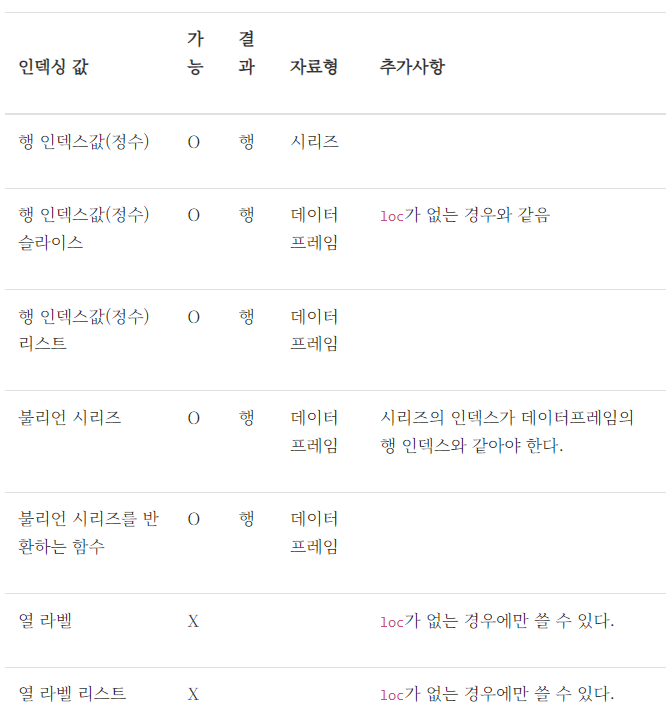

### 인덱싱 값을 행과 열 모두 받는 경우
인덱싱값을 행과 열 모두 받으려면 df.loc[행 인덱스, 열 인덱스]와 같은 형태로 사용한다. 

행 인덱스 라벨값이 a, 열 인덱스 라벨값이 A인 위치의 값을 구하는 것은 다음과 같다.

In [ ]:
print(df.loc['a', 'A'])

10


인덱싱값으로 라벨 데이터의 슬라이싱 또는 리스트를 사용할 수도 있다.

In [ ]:
df.loc["b":, "A"]

b    14
c    18
Name: A, dtype: int64

In [ ]:
df.loc['a', :]

A    10
B    11
C    12
D    13
Name: a, dtype: int64

In [ ]:
df.loc[['a', 'b'], ['B', 'D']]

,B,D
a,11,13
b,15,17


In [ ]:
df.loc[df.A > 10, ['C', 'D']]

,C,D
b,16,17
c,20,21


### iloc 인덱서
iloc 인덱서는 loc 인덱서와 반대로 라벨이 아니라 순서를 나타내는 정수(integer) 인덱스만 받는다. 

다른 사항은 loc 인덱서와 같다.

In [ ]:
print(df.iloc[0, 1])

11


In [ ]:
print(df.iloc[:2, 2])

a    12
b    16
Name: C, dtype: int64


In [ ]:
print(df.iloc[0, -2:])

C    12
D    13
Name: a, dtype: int64


In [ ]:
print(df.iloc[2:3, 1:3])

    B   C
c  19  20


In [ ]:
df.iloc[-1]

A    18
B    19
C    20
D    21
Name: c, dtype: int64

In [ ]:
df.iloc[-1] = df.iloc[-1] * 2
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42


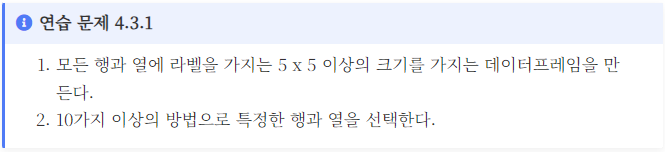

In [ ]:
df = pd.DataFrame(np.arange(10, 35).reshape(5, 5),
                  index=["a", "b", "c", "d", "e"],
                  columns=["A", "B", "C", "D", "E"])
df

,A,B,C,D,E
a,10,11,12,13,14
b,15,16,17,18,19
c,20,21,22,23,24
d,25,26,27,28,29
e,30,31,32,33,34


In [ ]:
df[['A']]

,A
a,10
b,15
c,20
d,25
e,30


In [ ]:
df.loc['a']

A    10
B    11
C    12
D    13
E    14
Name: a, dtype: int64

In [ ]:
df.loc[df.loc[:,'A'] > 20]

,A,B,C,D,E
d,25,26,27,28,29
e,30,31,32,33,34


In [ ]:
df.loc['d':'e']

,A,B,C,D,E
d,25,26,27,28,29
e,30,31,32,33,34


In [ ]:
print(df.loc['e', 'D'])

33


In [ ]:
df.loc[['a', 'b'], ['B', 'D']]

,B,D
a,11,13
b,16,18


In [ ]:
df.iloc[0,:]

A    10
B    11
C    12
D    13
E    14
Name: a, dtype: int64

In [ ]:
df.iloc[1,2]

np.int64(17)

In [ ]:
df.iloc[1:3,-2:]

,D,E
b,18,19
c,23,24


# 4.4 데이터프레임의 데이터 조작

### 데이터 개수 세기
count 메서드: 데이터 개수를 센다. NaN 값은 세지 않는다.

In [ ]:
s = pd.Series(range(10))
print(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64


In [ ]:
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [ ]:
s.count()

np.int64(9)

데이터프레임에서는 각 열마다 별도로 데이터 개수를 센다. 

데이터에서 값이 누락된 부분을 찾을 때 유용하다.

In [ ]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,4.0
3,4.0,3.0,4.0,2.0


In [ ]:
df.iloc[2, 3] = np.nan
df.count()

0    4
1    4
2    4
3    3
dtype: int64

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


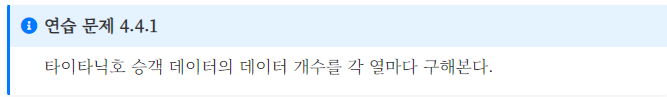

In [ ]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### 카테고리 값 세기
시리즈의 값이 정수, 문자열, 카테고리 값인 경우에는 value_counts 메서드로 각각의 값이 나온 횟수를 셀 수 있다.

In [ ]:
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100))
s2.tail()

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [ ]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
Name: count, dtype: int64

데이터프레임에는 value_counts 메서드가 없으므로 각 열마다 별도로 적용해야 한다.

In [ ]:
df[0].value_counts()

0
3.0    2
0.0    1
4.0    1
Name: count, dtype: int64

### 정렬
- sort_index 메서드: 인덱스 값 기준으로 정렬
- sort_values 메서드: 데이터 값 기준으로 정렬
    - by 인수: 데이터프레임에서 sort_values 메서드를 사용할 때 기준이 되는 열 지정

In [ ]:
s2.value_counts().sort_index()

0    18
1    22
2    13
3    14
4    17
5    16
Name: count, dtype: int64

NaN값이 있는 경우에는 정렬하면 NaN값이 가장 나중으로 간다.

In [ ]:
s.sort_values()

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

- ascending=False: 내림차순 정렬

In [ ]:
s.sort_values(ascending=False)

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

In [ ]:
df.sort_values(by=1)

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [ ]:
df.sort_values(by=[1, 2])

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


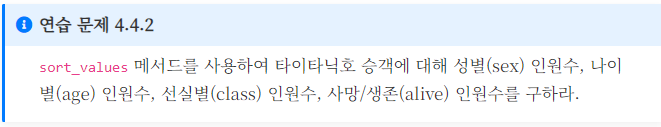

In [ ]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [ ]:
titanic['alive'].value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

### 행/열 합계
- sum(axis=) 메서드 사용
    - axis 인수: 합계로 인해 없어지는 방향축(0: 행, 1: 열) 지정


In [ ]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4, 8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [ ]:
# 행방향 합계
df.sum(axis=1)

0     5.0
1     6.0
2     9.0
3    13.0
dtype: float64

In [ ]:
df2["RowSum"] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,70
1,6,9,2,4,5,2,4,2,68
2,4,7,7,9,1,7,0,6,82
3,9,9,7,6,9,1,0,1,84


In [ ]:
# 열 합계 (axis=0 생략 가능)
df2.sum()

0          24
1          33
2          25
3          24
4          15
5          10
6           5
7          16
RowSum    304
dtype: int64

In [ ]:
df2.loc['Coltotal', :] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,70.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,68.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,82.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,84.0
Coltotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,304.0


mean 메서드 (평균) 사용법도 sum 메서드와 같음.

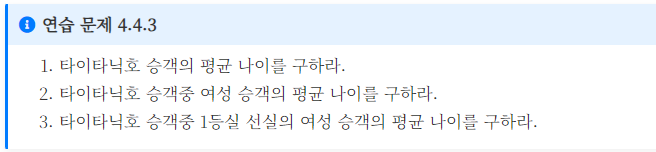

In [ ]:
print(titanic['age'].mean())
titanic['age']

29.69911764705882


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [ ]:
print(titanic.loc[titanic['sex'] == 'female',:]['age'].mean())

27.915708812260537


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(titanic.loc[(titanic['class'] == 'First') & (titanic['sex'] == 'female'), :]['age'].mean())

34.61176470588235


### apply 변환
- 행이나 열 단위로 더 복잡한 처리를 하고 싶을 때는 apply 메서드를 사용한다.
- 인수로 행 또는 열을 받는 함수를 넣으면 그 함수를 각 행/열에 적용
    - axis = 0: 열 (생략가능)
    - axis = 1: 행

In [ ]:
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# 각 열의 최댓값과 최솟값
df3.apply(lambda x: x.max() - x.min())

A    3
B    2
C    4
dtype: int64

In [ ]:
# 행에 적용
df3.apply(lambda x: x.max() - x.min(), axis = 1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

각 열에 대해 어떤 값이 얼마나 사용되었는지 알고 싶다면 value_counts 함수를 넣으면 된다.

In [ ]:
df3.apply(pd.value_counts)

C:\Users\kingm\AppData\Local\Temp\ipykernel_29004\3610007328.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df3.apply(pd.value_counts)


,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [ ]:
# 타이타닉호의 승객 중 나이 20살을 기준으로
# 성인(adult)과 미성년자(child)를 구별하는 라벨 열 만들기

titanic['adult/child'] = titanic.apply(lambda r: 'adult' if r.age >= 20 else 'child', axis = 1)
titanic.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


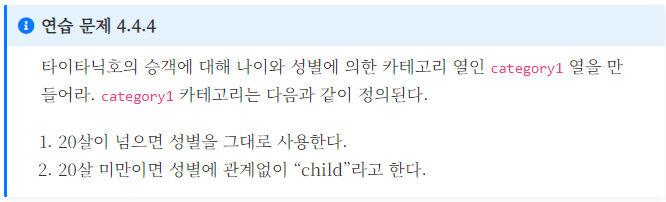

In [ ]:
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis = 1)
print(titanic.tail())

     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone adult/child category1  
886    man        True  NaN  Southampton    no   True       adult      male  
887  woman       False    B  Southampton   yes   True       child     child  
888  woman       False  NaN  Southampton    no  False       child     child  
889    man        True    C    Cherbourg   yes   True       adult      male  
890    man        True  NaN   Queenstown    no   True       adult      male  


### astype 메서드
전체 데이터의 자료형을 바꾼다.

In [ ]:
df3.apply(pd.value_counts).fillna(0).astype(int)

C:\Users\kingm\AppData\Local\Temp\ipykernel_29004\3039969621.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df3.apply(pd.value_counts).fillna(0).astype(int)


,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


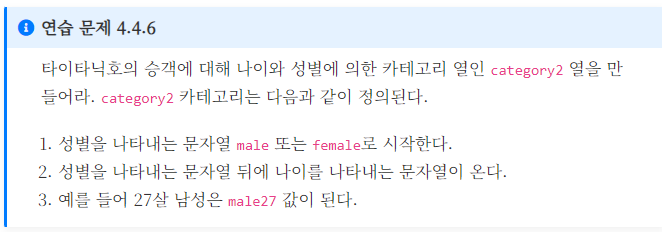

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['category2'] = titanic.apply(lambda x : f'{x.sex}{round(x.age)}', axis=1)

titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male27
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,female19
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female30
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male26
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male32


### 실수 값을 카테고리 값으로 변환
- cut: 실수 값의 경계선을 지정하는 경우
- qcut: 개수가 똑같은 구간으로 나누는 경우

In [ ]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 101]

cut 명령을 사용하면 실수값을 다음처럼 카테고리 값으로 바꿀 수 있다. bins 인수는 카테고리를 나누는 기준값이 된다. 영역을 넘는 값은 NaN으로 처리된다.

In [ ]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '장년', '미성년자', '중년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

cut 명령이 반환하는 값은 Categorical 클래스 객체이다. 

categories 속성: 라벨 문자열

codes 속성: 정수로 인코딩한 카테고리 값

In [ ]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [ ]:
cats.categories

Index(['미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [ ]:
cats.codes

array([-1,  0,  0,  1,  1,  2,  2,  3,  0,  2,  2, -1], dtype=int8)

In [ ]:
df4 = pd.DataFrame(ages, columns=["ages"])
df4['age_cat'] = pd.cut(df4.ages, bins, labels=labels)
df4

,ages,age_cat
0,0,NaN
1,2,미성년자
2,10,미성년자
3,21,청년
4,23,청년
5,37,중년
6,31,중년
7,61,장년
8,20,미성년자
9,41,중년


위 데이터프레임의 age_cat 열값은 문자열이 아니다. 

이를 문자열로 만들려면 astype 메서드를 사용해야 한다.

In [ ]:
df4.age_cat.astype(str) + df4.ages.astype(str)

0       nan0
1      미성년자2
2     미성년자10
3       청년21
4       청년23
5       중년37
6       중년31
7       장년61
8     미성년자20
9       중년41
10      중년32
11    nan101
dtype: object

qcut 명령은 구간 경계선을 지정하지 않고 데이터 개수가 같도록 지정한 수의 구간으로 나눈다.

예를 들어 다음 코드는 1000개의 데이터를 4개의 구간으로 나누는데 각 구간은 250개씩의 데이터를 가진다.

In [ ]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
cats

['Q2', 'Q1', 'Q2', 'Q3', 'Q1', ..., 'Q1', 'Q1', 'Q4', 'Q4', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [ ]:
pd.value_counts(cats)

C:\Users\kingm\AppData\Local\Temp\ipykernel_29004\1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


Q1    250
Q2    250
Q3    250
Q4    250
Name: count, dtype: int64

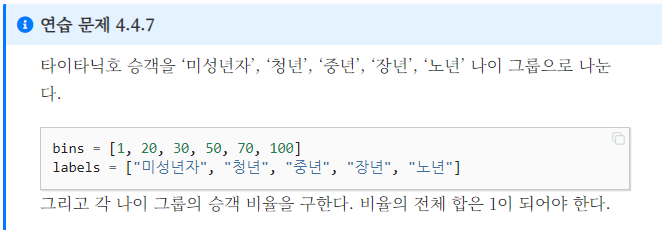

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male22
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female38
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female26
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female35
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male35


In [ ]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
t = pd.cut(titanic.age, bins, labels=labels)
ratio = pd.value_counts(t) / pd.value_counts(t).sum()
ratio['합계'] = ratio.sum()
ratio


C:\Users\kingm\AppData\Local\Temp\ipykernel_29004\1708360354.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ratio = pd.value_counts(t) / pd.value_counts(t).sum()
C:\Users\kingm\AppData\Local\Temp\ipykernel_29004\1708360354.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ratio = pd.value_counts(t) / pd.value_counts(t).sum()


age
청년      0.464082
중년      0.274800
미성년자    0.188141
장년      0.067275
노년      0.005701
합계      1.000000
Name: count, dtype: float64

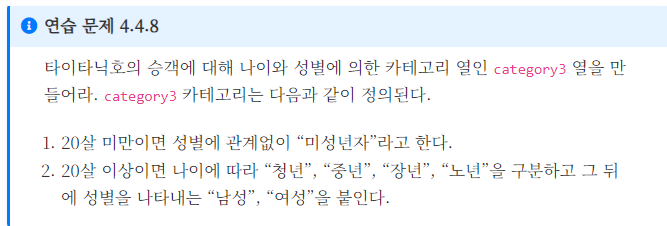

In [ ]:
cat = pd.cut(titanic.age, bins, labels=labels)
cat1 = cat.astype(str)
print(cat1)
titanic['category3'] = cat1
titanic['category3']


0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: age, Length: 891, dtype: object


0        청년
1        중년
2        청년
3        중년
4        중년
       ... 
886      청년
887    미성년자
888      청년
889      청년
890      중년
Name: category3, Length: 891, dtype: object

In [ ]:
titanic['category3'] = titanic.apply(lambda x : '미성년자' if x.age < 20 else '{0}{1}'.format(x.category3, '남성' if x.sex == 'male' else '여성'), axis = 1)
titanic['category3']

0      청년남성
1      중년여성
2      청년여성
3      중년여성
4      중년남성
       ... 
886    청년남성
887    미성년자
888    청년여성
889    청년남성
890    중년남성
Name: category3, Length: 891, dtype: object

# 4.5 데이터프레임 인덱스 조작

### 데이터프레임 인덱스 설정 및 제거

- set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정

- reset_index : 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가

In [ ]:
np.random.seed(0)
df1 = pd.DataFrame(np.vstack([list('ABCDE'),
                              np.round(np.random.rand(3, 5), 2)]).T,
                   columns=["C1", "C2", "C3", "C4"])
df1

,C1,C2,C3,C4
0,A,0.55,0.65,0.79
1,B,0.72,0.44,0.53
2,C,0.6,0.89,0.57
3,D,0.54,0.96,0.93
4,E,0.42,0.38,0.07


In [ ]:
df2 = df1.set_index('C1')
df2

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


In [ ]:
df2.set_index('C2')

,C3,C4
C2,,
0.55,0.65,0.79
0.72,0.44,0.53
0.6,0.89,0.57
0.54,0.96,0.93
0.42,0.38,0.07


- set_index : 기존의 행 인덱스를 제거하고 데이터 열 중 하나를 인덱스로 설정

- reset_index : 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가

In [ ]:
df2.reset_index()

,C2,C3,C4
C1,,,
A,0.55,0.65,0.79
B,0.72,0.44,0.53
C,0.6,0.89,0.57
D,0.54,0.96,0.93
E,0.42,0.38,0.07


reset_index 메서드를 호출할 때 인수 drop=True 로 설정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.

In [ ]:
df2.reset_index(drop=True)

,C2,C3,C4
0,0.55,0.65,0.79
1,0.72,0.44,0.53
2,0.6,0.89,0.57
3,0.54,0.96,0.93
4,0.42,0.38,0.07


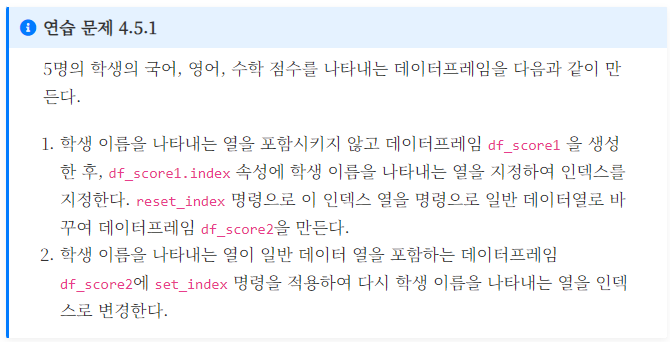

In [73]:
import numpy as np


In [91]:
df_score1 = np.random.randint(0, 100, size=(5, 3))

df_score1

array([[89, 46, 14],
       [21, 51, 43],
       [24, 39,  8],
       [65,  2, 18],
       [ 9, 13, 18]], dtype=int32)

In [92]:
columns = ['국어', '영어', '수학']
index = ['a', 'b', 'c', 'd', 'e']
df_score1 = pd.DataFrame(df_score1, index = index, columns=columns)

print(df_score1)

   국어  영어  수학
a  89  46  14
b  21  51  43
c  24  39   8
d  65   2  18
e   9  13  18


In [93]:
df_score2 = df_score1.reset_index()
print(df_score2)

  index  국어  영어  수학
0     a  89  46  14
1     b  21  51  43
2     c  24  39   8
3     d  65   2  18
4     e   9  13  18


In [98]:
print(df_score2.set_index('index'))

       국어  영어  수학
index            
a      89  46  14
b      21  51  43
c      24  39   8
d      65   2  18
e       9  13  18


### 다중 인덱스
- 다중 인덱스: 행이나 열에 여러 계층을 가지는 인덱스

데이터프레임을 생성할 때 columns 인수에 다음 예제처럼 리스트의 리스트(행렬) 형태로 인덱스를 넣으면 다중 열 인덱스를 가지게 된다.

In [100]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])

df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

- 다중인덱스 이름 지정
     - columns 객체의 names 속성에 리스트를 넣어서 지정

In [101]:
df3.columns.names = ['Cidx1', 'Cidx2']
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

- 데이터프레임을 생성할 때 index 인수에 리스트의 리스트(행렬) 형태로 인덱스를 넣으면 다중 (행) 인덱스를 가진다.
- 행 인덱스들의 이름 지정은 index 객체의 names 속성에 리스트를 넣어서 지정한다

In [102]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

### 행 인덱스와 열 인덱스 교환
- stack: 열 인덱스 -> 행 인덱스
    - 열 인덱스가 반시계 방향으로 90도 회전
- unstack: 행 인덱스 -> 열 인덱스
    - 헹 인덱스가 시계 방향으로 90도 회전

- 인덱스를 지정할 때는 문자열 이름과 순서를 표시하는 숫자 인덱스를 모두 사용할 수 있다.


In [103]:
df4.stack('Cidx1')

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\3130997952.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df4.stack('Cidx1')


Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [104]:
df4.stack(1)

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\3174640517.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df4.stack(1)


Cidx1                 A     B
Ridx1 Ridx2 Cidx2            
M     id_1  C      1.76  0.98
            D      0.40  2.24
      id_2  C      1.87  0.95
            D     -0.98 -0.15
      id_3  C     -0.10  0.14
            D      0.41  1.45
F     id_1  C      0.76  0.44
            D      0.12  0.33
      id_2  C      1.49  0.31
            D     -0.21 -0.85
      id_3  C     -2.55  0.86
            D      0.65 -0.74

In [105]:
df4.unstack('Ridx2')

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [106]:
df4.unstack(0)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1   0.76  1.76  0.12  0.40  0.44  0.98  0.33  2.24
id_2   1.49  1.87 -0.21 -0.98  0.31  0.95 -0.85 -0.15
id_3  -2.55 -0.10  0.65  0.41  0.86  0.14 -0.74  1.45

### 다중 인덱스가 있는 경우의 인덱싱
다중 인덱스를 가지는 경우에는 인덱스 값이 하나의 라벨이나 숫자가 아니라 

()로 둘러싸인 튜플이 되어야 한다.

단, iloc 인덱서를 사용하는 경우에는 튜플 형태의 다중인덱스를 사용할 수 없다.

In [107]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [108]:
df3[('B','C1')]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

In [109]:
df3.loc[0, ('B', 'C1')]

np.float64(0.98)

In [111]:
df3.loc[0, ('B', 'C1')] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [112]:
# 단, iloc 인덱서를 사용하는 경우에는 튜플 형태의 다중인덱스를 사용할 수 없다.
df3.iloc[0, 2]

np.float64(100.0)

하나의 레벨 값만 넣으면 다중 인덱스 중에서 가장 상위의 값을 지정한 것으로 본다.

In [113]:
df3['A']

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


In [114]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [115]:
df4.loc[('M', 'id_1'), ('A', 'C')]

np.float64(1.76)

In [116]:
df4.loc[:, ('A', 'C')]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

In [117]:
df4.loc[('M', 'id_1'), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [119]:
df4.loc[('All', 'All'), :] = df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    6.46  0.78  7.36  4.56

loc를 사용하는 경우에도 튜플이 아닌 하나의 값만 쓰면 가장 상위의 인덱스를 지정한 것과 같다.

In [120]:
df4.loc['M']

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

특정 레벨의 모든 인덱스 값을 인덱싱할 때는 슬라이스를 사용한다. 

다만 다중 인덱스의 튜플 내에서는 : 슬라이스 기호를 사용할 수 없고 대신 slice(None) 값을 사용해야 한다.

In [121]:
df4.loc[('M', slice(None)), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [122]:
df4.loc[(slice(None), 'id_1'), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

### 다중 인덱스의 인덱스 순서 교환
- swaplevel(i, j, axis)
    - i, j : 교환하고자 하는 인덱스 라벨(인덱스 번호)
    - axis 
        - 0: 행 인덱스 (디폴트)
        - 1: 열 인덱스


In [123]:
df5 = df4.swaplevel('Ridx1', 'Ridx2')
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    6.46  0.78  7.36  4.56

In [124]:
df6 = df4.swaplevel('Cidx1', 'Cidx2', 1)
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    6.46  0.78  7.36  4.56

### 다중 인덱스가 있는 경우의 정렬
다중 인덱스가 있는 데이터프레임을 sort_index로 정렬할 때는 level 인수를 사용하여 어떤 인덱스를 기준으로 정렬하는지 알려주어야 한다.

In [125]:
df5.sort_index(level=0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    6.46  0.78  7.36  4.56
id_1  F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id_2  F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id_3  F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [126]:
df6.sort_index(axis=1, level=0)

Cidx2           C           D      
Cidx1           A     B     A     B
Ridx1 Ridx2                        
M     id_1   1.76  0.98  0.40  2.24
      id_2   1.87  0.95 -0.98 -0.15
      id_3  -0.10  0.14  0.41  1.45
F     id_1   0.76  0.44  0.12  0.33
      id_2   1.49  0.31 -0.21 -0.85
      id_3  -2.55  0.86  0.65 -0.74
All   All    6.46  7.36  0.78  4.56

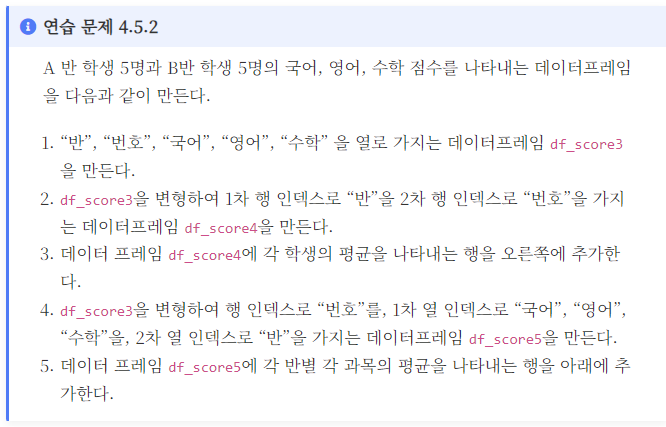

In [139]:
scoredata = pd.DataFrame(np.random.randint(0, 100, size = (10, 3)))
classdata = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
numdata = pd.Series([1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
df_score3 = pd.concat([classdata, numdata, scoredata], axis=1)
print(data)

columns = ['반', '번호', '국어', '영어', '수학']

df_score3.columns = columns
df_score3

   반  번호  국어  영어  수학
0  A   1  72  71  87
1  A   2  13  58  81
2  A   3  55  64  75
3  A   4  92  36  25
4  A   5  32  42  14
5  B   1  86  28  20
6  B   2  82  68  22
7  B   3  99  83   7
8  B   4  72  61  13
9  B   5   5   0   8


,반,번호,국어,영어,수학
0,A,1,79,79,53
1,A,2,11,4,39
2,A,3,92,45,26
3,A,4,74,52,49
4,A,5,91,51,99
5,B,1,18,34,51
6,B,2,30,53,58
7,B,3,43,55,18
8,B,4,45,87,65
9,B,5,70,53,48


In [158]:
df_score4 = df_score3.set_index('반')

In [159]:
df_score4['평균'] = df_score4.iloc[:,1:4].mean(axis=1)
df_score4

,번호,국어,영어,수학,평균
반,,,,,
A,1,79,79,53,70.333333
A,2,11,4,39,18.000000
A,3,92,45,26,54.333333
A,4,74,52,49,58.333333
A,5,91,51,99,80.333333
B,1,18,34,51,34.333333
B,2,30,53,58,47.000000
B,3,43,55,18,38.666667
B,4,45,87,65,65.666667


In [160]:
df_score3 = df_score3.set_index(['반', '번호'])
df_score5 = df_score3.unstack('반')
df_score5

국어      영어      수학    
반    A   B   A   B   A   B
번호                        
1   79  18  79  34  53  51
2   11  30   4  53  39  58
3   92  43  45  55  26  18
4   74  45  52  87  49  65
5   91  70  51  53  99  48

In [164]:
df_score5.loc['평균',:] = df_score5.mean()
df_score5

국어          영어          수학      
반      A     B     A     B     A     B
번호                                    
1   79.0  18.0  79.0  34.0  53.0  51.0
2   11.0  30.0   4.0  53.0  39.0  58.0
3   92.0  43.0  45.0  55.0  26.0  18.0
4   74.0  45.0  52.0  87.0  49.0  65.0
5   91.0  70.0  51.0  53.0  99.0  48.0
평균  69.4  41.2  46.2  56.4  53.2  48.0

# 4.6 데이터프레임 합성
- 병합(merge)
- 연결(contact)

### merge 함수를 사용한 데이터프레임 병합
merge 함수는 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다. 

이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다.

In [165]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])

df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [166]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


merge 함수로 위의 두 데이터프레임 df1, df2 를 합치면 공통 열인 고객번호 열을 기준으로 데이터를 찾아서 합친다. 

이 때 기본적으로는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용한다.

In [167]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여준다.

how = 'outer'

In [168]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


left, right 방식은 각각 첫번째, 혹은 두번째 데이터프레임의 키 값을 모두 보여준다.

In [169]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [170]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


만약 테이블에 키 값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의 수를 따져서 조합을 만들어 낸다.

In [171]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [172]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [173]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


두 데이터프레임에서 이름이 같은 열은 모두 키가 된다. 

만약 이름이 같아도 키가 되면 안되는 열이 있다면 on 인수로 기준열을 명시해야 한다.

다음 예에서 첫번째 데이터프레임의 “데이터”는 실제로는 금액을 나타내는 데이터이고 두번째 데이터프레임의 “데이터”는 실제로는 성별을 나타내는 데이터이므로 이름이 같아도 다른 데이터이다. 따라서 이 열은 기준열이 되면 안된다.

In [174]:
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [175]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [176]:
pd.merge(df1, df2, on = '고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


반대로 키가 되는 기준열의 이름이 두 데이터프레임에서 다르다면 

left_on, right_on 인수를 사용하여 기준열을 명시해야 한다.

In [177]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [178]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [179]:
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


일반 데이터 열이 아닌 인덱스를 기준열로 사용하려면 left_index 또는 right_index 인수를 True 로 설정한다.

In [180]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [181]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [182]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [183]:
df1 = pd.DataFrame(
    [[1., 2.], [3., 4.], [5., 6.]],
    index=['a', 'c', 'e'],
    columns=['서울', '부산'])
df1

,서울,부산
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [184]:
df2 = pd.DataFrame(
    [[7., 8.], [9., 10.], [11., 12.], [13, 14]],
    index=['b', 'c', 'd', 'e'],
    columns=['대구', '광주'])
df2

,대구,광주
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [185]:
pd.merge(df1, df2, how='outer', left_index=True, right_index=True)

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### join 인덱스
merge 대신 join 사용 가능

In [186]:
df1.join(df2, how='outer')

,서울,부산,대구,광주
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


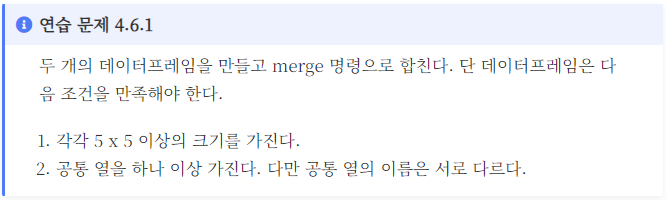

In [188]:
df1 = pd.DataFrame(np.arange(25).reshape(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'])
df1

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [194]:
df2 = pd.DataFrame({'A':[0, 5, 10, 15, 20],
                    'B': np.arange(5),
                    'C': np.arange(5),
                    'D': np.arange(5), 
                    'E': np.arange(5)})
df2

,A,B,C,D,E
0,0,0,0,0,0
1,5,1,1,1,1
2,10,2,2,2,2
3,15,3,3,3,3
4,20,4,4,4,4


In [193]:
pd.merge(df1, df2, left_on='a', right_on='A')

,a,b,c,d,e,A,B,C,D
0,0,1,2,3,4,0,0,0,0
1,5,6,7,8,9,5,1,1,1
2,10,11,12,13,14,10,2,2,2
3,15,16,17,18,19,15,3,3,3
4,20,21,22,23,24,20,4,4,4


### concat 함수를 사용한 데이터 연결
concat 함수를 사용하면 기준 열(key column)을 사용하지 않고 단순히 데이터를 연결(concatenate)한다.

기본적으로는 위/아래로 데이터 행을 연결한다. 

단순히 두 시리즈나 데이터프레임을 연결하기 때문에 인덱스 값이 중복될 수 있다.

In [195]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])
print(s1)
print()
print(s2)

A    0
B    1
dtype: int64

A    2
B    3
C    4
dtype: int64


In [197]:
pd.concat([s1, s2])

A    0
B    1
A    2
B    3
C    4
dtype: int64

만약 옆으로 데이터 열을 연결하고 싶으면 axis=1로 인수를 설정한다.

In [199]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2),
    index=['a', 'b', 'c'],
    columns=['데이터1', '데이터2']
)
df1

,데이터1,데이터2
a,0,1
b,2,3
c,4,5


In [201]:
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2),
    index=['a', 'c'],
    columns=['데이터3', '데이터4']
)

df2

,데이터3,데이터4
a,5,6
c,7,8


In [202]:
pd.concat([df1, df2], axis=1)

,데이터1,데이터2,데이터3,데이터4
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


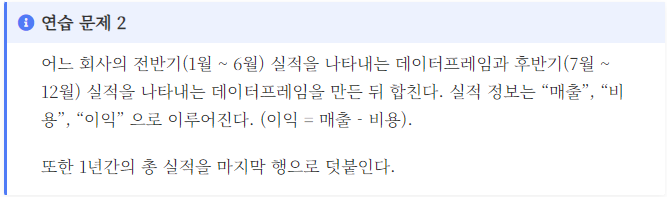

In [215]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randint(1, 10000, size = (6, 2)),
                   index = [str(i) + '월' for i in range(1, 7)],
                   columns = ['매출', '비용'])
df1.loc[:,'이익'] = df1.loc[:,'매출'] - df1.loc[:, '비용']
df1



,매출,비용,이익
1월,2733,9846,-7113
2월,3265,4860,-1595
3월,9226,7892,1334
4월,4374,5875,-1501
5월,6745,3469,3276
6월,706,2600,-1894


In [216]:
df2 = pd.DataFrame(np.random.randint(1, 10000, size = (6, 2)),
                   index = [str(i) + '월' for i in range(7, 13)],
                   columns = ['매출', '비용'])
df2.loc[:,'이익'] = df2.loc[:,'매출'] - df2.loc[:, '비용']
df2

,매출,비용,이익
7월,2223,7769,-5546
8월,2898,9894,-6996
9월,538,6217,-5679
10월,6922,6037,885
11월,2164,5073,-2909
12월,4852,7878,-3026


In [226]:
df3 = pd.concat([df1, df2])

In [227]:
df3.loc['총 실적',:] = df3.sum(axis=0)

In [228]:
df3

,매출,비용,이익
1월,2733.0,9846.0,-7113.0
2월,3265.0,4860.0,-1595.0
3월,9226.0,7892.0,1334.0
4월,4374.0,5875.0,-1501.0
5월,6745.0,3469.0,3276.0
6월,706.0,2600.0,-1894.0
7월,2223.0,7769.0,-5546.0
8월,2898.0,9894.0,-6996.0
9월,538.0,6217.0,-5679.0
10월,6922.0,6037.0,885.0


# 4.7 피봇테이블과 그룹분석
피봇테이블(pivot table): 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말한다.

- pivot 메서드
    - index=: 행 인덱스로 사용할 열 이름
    - columns=: 열 인덱스로 사용할 열 이름
    - values=: 데이터로 사용할 열 이름

판다스는 지정된 두 열을 각각 행 인덱스와 열 인덱스로 바꾼 후 행 인덱스의 라벨 값이 첫번째 키의 값과 같고 열 인덱스의 라벨 값이 두번째 키의 값과 같은 데이터를 찾아서 해당 칸에 넣는다. 

만약 주어진 데이터가 존재하지 않으면 해당 칸에 NaN 값을 넣는다.

In [231]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


도시 이름: 열 인덱스

연도: 행 인덱스

가 되어 행과 열 인덱스만 보면 어떤 도시의 어떤 시점의 인구를 쉽게 알 수 있도록 피봇테이블을 만들어 보자.

In [234]:
df1.pivot(index='도시', columns='연도', values='인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


이 피봇테이블의 값 3512547은 “도시”가 부산이고 “연도”가 2005년인 데이터를 “인구”열에서 찾은 값이다.

피봇테이블은 다음과 같이 set_index 명령과 unstack 명령을 사용해서 만들 수도 있다.

In [240]:
df1.set_index(['도시', '연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

만약 행 인덱스와 열 인덱스 조건을 만족하는 데이터가 2개 이상인 경우에는 에러가 발생한다. 

예를 들어 위 데이터프레임에서 (“지역”, “연도”)를 키로 하면 (“수도권”, “2015”)에 해당하는 값이 두 개 이상이므로 다음과 같이 에러가 발생한다.

In [241]:
try:
    df1.pivot(index='지역', columns='연도', values='인구')
except ValueError as e:
    print('ValueError:', e)

ValueError: Index contains duplicate entries, cannot reshape


### 그룹분석
만약 키가 지정하는 조건에 맞는 데이터가 하나 이상이라서 데이터 그룹을 이루는 경우에는 그룹의 특성을 보여주는 그룹분석(group analysis)을 해야 한다.

그룹분석은 피봇테이블과 달리 키에 의해서 결정되는 데이터가 여러개가 있을 경우 미리 지정한 연산을 통해 그 그룹 데이터의 대표값을 계산한다. 판다스에서는 groupby 메서드를 사용하여 다음처럼 그룹분석을 한다.

1. 분석하고자 하는 시리즈나 데이터프레임에 groupby 메서드를 호출하여 그룹화를 한다.
2. 그룹 객체에 대해 그룹연산을 수행한다.

#### groupby 메서드
- 인수
    - 열 또는 열의 리스트
    - 행 인덱스

연산 결과로 그룹 데이터를 나타내는 GroupBy 클래스 객체를 반환한다. 이 객체에는 그룹별로 연산을 할 수 있는 그룹연산 메서드가 있다.

#### 그룹연산 메서드
- GroupBy 클래스 객체의 뒤에 붙일 수 있는 그룹연산 메서드
    - size, count: 그룹 데이터의 개수
    - mean, median, min, max
    - sum, prod, std, var, quantile: 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
    - first, last: 그룹 데이터 중 가장 첫 번째 데이터와 가장 나중 데이터

    
    - agg, aggregate
        - 만약 원하는 그룹연산이 없는 경우 함수를 만들고 이 함수를 agg에 전달한다.
        - 또는 여러가지 그룹연산을 동시에 하고 싶은 경우 함수 이름 문자열의 리스트를 전달한다.
    - describe: 하나의 그룹 대표값이 아니라 여러개의 값을 데이터프레임으로 구한다.
    - apply: describe처럼 하나의 대표값이 아닌 데이터프레임을 출력하지만 원하는 그룹 연산이 없는 경우에 사용
    - transform: 그룹에 대한 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터 자체를 변형

In [243]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [244]:
# groupby 명령을 사용하여 그룹 A와 그룹 B로 구분한 그룹 데이터를 만든다.
groups = df2.groupby(df2.key1)
groups

이 GroupBy 클래스 객체에는 각 그룹 데이터의 인덱스를 저장한 groups 속성이 있다.

In [245]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [246]:
# A그룹과 B그룹 데이터의 합계를 구하기 위해 sum이라는 그룹연산을 한다.
groups.sum()

,key2,data1,data2
key1,,,
A,onetwoone,8,80
B,onetwo,7,70


GroupBy 클래스 객체를 명시적으로 얻을 필요가 없다면 groupby 메서드와 그룹연산 메서드를 연속으로 호출한다. 

다음 예제는 열 data1에 대해서만 그룹연산을 하는 코드이다.

In [247]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

데이터를 그룹으로 나눈 GroupBy 클래스 객체 또는 그룹분석한 결과에서 data1만 뽑아도 된다.

In [250]:
# `GroupBy` 클래스 객체에서 data1만 선택하여 분석하는 경우
df2.groupby(df2.key1)['data1'].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [252]:
# 전체 데이터를 분석한 후 data1만 선택한 경우
df2.groupby(df2.key1).sum()['data1']


pandas.core.series.Series

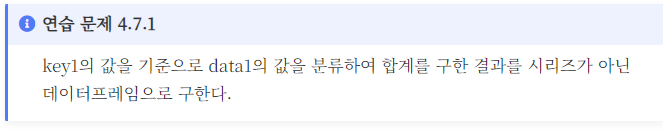

In [253]:
pd.DataFrame(df2.groupby(df2.key1).sum()['data1'])

,data1
key1,
A,8
B,7


이번에는 복합 키 (key1, key2) 값에 따른 data1의 합계를 구하자. 

분석하고자 하는 키가 복수이면 리스트를 사용한다.

In [255]:
print(df2)
print()
df2.data1.groupby([df2.key1, df2.key2]).sum()

  key1 key2  data1  data2
0    A  one      1     10
1    A  two      2     20
2    B  one      3     30
3    B  two      4     40
4    A  one      5     50



key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

이 결과를 unstack 명령으로 피봇 데이블 형태로 만들수도 있다.

In [256]:
df2.data1.groupby([df2.key1, df2.key2]).sum().unstack('key2')

key2,one,two
key1,,
A,6,2
B,3,4


그룹분석 기능을 사용하면 위의 인구 데이터로부터 지역별 합계를 구할 수도 있다.

In [258]:
print(df1)
print()
df1['인구'].groupby([df1['지역'], df1['연도']]).sum().unstack('연도')

   도시    연도       인구   지역
0  서울  2015  9904312  수도권
1  서울  2010  9631482  수도권
2  서울  2005  9762546  수도권
3  부산  2015  3448737  경상권
4  부산  2010  3393191  경상권
5  부산  2005  3512547  경상권
6  인천  2015  2890451  수도권
7  인천  2010   263203  수도권



연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


다음 데이터는 150 송이의 붓꽃(iris)에 대해 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width), 꽃잎폭(sepal_width), 꽃잎폭(sepal_width)을 측정한 데이터이다.

In [259]:
import seaborn as sns
iris = sns.load_dataset("iris")

각 붓꽃 종별로 가장 큰 값과 가장 작은 값의 비율을 구해보자. 

이러한 계산을 하는 그룹연산 메서드는 없으므로 직접 만든 후 agg 메서드를 적용한다.

In [260]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


describe 메서드를 사용하면 다양한 기술 통계(descriptive statistics)값을 한 번에 구한다. 

그룹별로 하나의 스칼라 값이 아니라 하나의 데이터프레임이 생성된다는 점에 주의하라.

In [261]:
iris.groupby(iris.species).describe().T

species               setosa  versicolor  virginica
sepal_length count  50.00000   50.000000   50.00000
             mean    5.00600    5.936000    6.58800
             std     0.35249    0.516171    0.63588
             min     4.30000    4.900000    4.90000
             25%     4.80000    5.600000    6.22500
...                      ...         ...        ...
petal_width  min     0.10000    1.000000    1.40000
             25%     0.20000    1.200000    1.80000
             50%     0.20000    1.300000    2.00000
             75%     0.30000    1.500000    2.30000
             max     0.60000    1.800000    2.50000

[32 rows x 3 columns]

apply 메서드를 사용하면 describe 메서드처럼 하나의 그룹에 대해 하나의 대표값(스칼라 값)을 구하는 게 아니라 데이터프레임을 만들 수 있다. 

예를 들어 다음처럼 각 붓꽃 종별로 가장 꽃잎 길이(petal length)가 큰 3개의 데이터를 뽑아낼 수도 있다.

In [262]:
def top3_petal_length(df):
    return df.sort_values(by='petal_length', ascending=False)[:3]

iris.groupby(iris.species).apply(top3_petal_length)

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1230603192.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  iris.groupby(iris.species).apply(top3_petal_length)


sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     44            5.1          3.8           1.9          0.4   
           24            4.8          3.4           1.9          0.2   
           18            5.7          3.8           1.7          0.3   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           52            6.9          3.1           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     44       setosa  
           24       setosa  
           18       setosa  
versicolor 83   versicolor  
           77   versicolor  
           52   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

transform 메서드는 그룹별 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터프레임 자체를 변화시킨다. 따라서 만들어진 데이터프레임의 크기는 원래 데이터프레임과 같다. 

예를 들어 다음처럼 각 붓꽃 꽃잎길이가 해당 종 내에서 대/중/소 어느 것에 해당되는지에 대한 데이터프레임을 만들 수도 있다.

In [264]:
def q3cut(s):
    return pd.qcut(s, 3, labels=['소','중', '대']).astype(str)

iris['petal_length_class'] = iris.groupby(iris.species).petal_length.transform(q3cut)

iris[['petal_length', 'petal_length_class']].tail(10)

,petal_length,petal_length_class
140,5.6,중
141,5.1,소
142,5.1,소
143,5.9,대
144,5.7,중
145,5.2,소
146,5.0,소
147,5.2,소
148,5.4,중
149,5.1,소


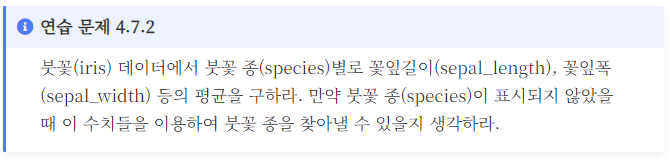

In [278]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [279]:
iris.groupby(iris.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### pivot_table
Pandas는 pivot 명령과 groupby 명령의 중간 성격을 가지는 pivot_table 명령도 제공한다.

pivot_table 명령은 groupby 명령처럼 그룹분석을 하지만 최종적으로는 pivot 명령처럼 피봇테이블을 만든다. 즉 groupby 명령의 결과에 unstack을 자동 적용하여 2차원적인 형태로 변형한다. 사용 방법은 다음과 같다.

- pivot_table(data, values=None, index=None, columns=None, aggfunc='mean'
fill_value=None, margins=False, margins_name='All')

    - data: 분석할 데이터프레임 (메서드일 때는 필요하지 않음)

    - values: 분석할 데이터프레임에서 분석할 열

    - index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트

    - columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트

    - aggfunc: 분석 메서드

    - fill_value: NaN 대체 값

    - margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부

    - margins_name: 마진 열(행)의 이름

만약 조건에 따른 데이터가 유일하게 선택되지 않으면 그룹연산을 하며 이 때 aggfunc 인수로 정의된 함수를 수행하여 대표값을 계산한다.

pivot_table를 메서드로 사용할 때는 객체 자체가 데이터가 되므로 data 인수가 필요하지 않다.

예를 들어 위에서 만들었던 피봇테이블은 pivot_table 명령으로 다음과 같이 만들 수도 있다. 인수의 순서에 주의하라.

In [282]:
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [280]:
df1.pivot_table("인구", "도시", "연도")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [283]:
df1.pivot(index='도시', columns='연도', values='인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


margins=True 인수를 주면 aggfunc로 주어진 분석 방법을 해당 열의 모든 데이터, 해당 행의 모든 데이터 그리고 전체 데이터에 대해 적용한 결과를 같이 보여준다. 

aggfunc가 주어지지 않았으면 평균을 계산한다.

In [284]:
df1.pivot_table("인구", "도시", "연도", margins=True, margins_name="합계")

연도,2005,2010,2015,합계
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
합계,6637546.5,4429292.0,5414500.0,5.350809e+06


행 인덱스나 열 인덱스에 리스트를 넣으면 다중 인덱스 테이블을 만든다.

In [285]:
df1.pivot_table('인구', index=['연도', '도시'])

인구
연도   도시           
2005 부산  3512547.0
     서울  9762546.0
2010 부산  3393191.0
     서울  9631482.0
     인천   263203.0
2015 부산  3448737.0
     서울  9904312.0
     인천  2890451.0

식당에서 식사 후 내는 팁(tip)과 관련된 데이터를 이용하여 좀더 구체적으로 그룹분석 방법을 살펴본다. 우선 Seaborn 패키지에 설치된 샘플 데이터를 로드한다. 이 데이터프레임에서 각각의 컬럼은 다음을 뜻한다.

total_bill: 식사대금

tip: 팁

sex: 성별

smoker: 흡연/금연 여부

day: 요일

time: 시간

size: 인원

In [286]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


분석의 목표는 식사 대금 대비 팁의 비율이 어떤 경우에 가장 높아지지는 찾는 것이다. 우선 식사대금와 팁의 비율을 나타내는 tip_pct를 추가하자.

In [288]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.tail()


,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


다음으로 각 열의 데이터에 대해 간단히 분포를 알아본다.

In [289]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


우선 성별로 나누어 데이터 개수를 세어본다.

In [290]:
tips.groupby("sex").count()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\294839457.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex").count()


,total_bill,tip,smoker,day,time,size,tip_pct
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


데이터 개수의 경우 NaN 데이터가 없다면 모두 같은 값이 나올 것이다. 이 때는 size 명령을 사용하면 더 간단히 표시된다. 

size 명령은 NaN이 있어도 상관하지 않는다.

In [291]:
tips.groupby("sex").size()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2787469288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex").size()


sex
Male      157
Female     87
dtype: int64

In [293]:
tips.groupby(["sex", "smoker"]).size()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\4151768403.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["sex", "smoker"]).size()


sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

In [292]:
tips.pivot_table("tip_pct", "sex", "smoker", aggfunc="count", margins=True)

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1013373349.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table("tip_pct", "sex", "smoker", aggfunc="count", margins=True)


smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


In [294]:
tips.groupby("sex")[["tip_pct"]].mean()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2774474356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")[["tip_pct"]].mean()


,tip_pct
sex,
Male,0.157651
Female,0.166491


In [296]:
tips.groupby("smoker")[["tip_pct"]].mean()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2313118402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")[["tip_pct"]].mean()


,tip_pct
smoker,
Yes,0.163196
No,0.159328


In [297]:
tips.pivot_table("tip_pct", "sex")

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1341534383.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table("tip_pct", "sex")


,tip_pct
sex,
Male,0.157651
Female,0.166491


In [298]:
tips.pivot_table("tip_pct", ["sex", "smoker"])

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1748078897.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table("tip_pct", ["sex", "smoker"])


tip_pct
sex    smoker          
Male   Yes     0.152771
       No      0.160669
Female Yes     0.182150
       No      0.156921

In [299]:
tips.pivot_table("tip_pct", "sex", "smoker")

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2873201655.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table("tip_pct", "sex", "smoker")


smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


In [300]:
tips.groupby("sex")[["tip_pct"]].describe()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\929131627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")[["tip_pct"]].describe()


tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
sex                                                                          
Male     157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female    87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

In [301]:
tips.groupby("smoker")[["tip_pct"]].describe()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\499673867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("smoker")[["tip_pct"]].describe()


tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
smoker                                                                       
Yes       93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   
No       151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   

                  
             max  
smoker            
Yes     0.710345  
No      0.291990

In [302]:
tips.groupby(["sex", "smoker"])[["tip_pct"]].describe()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\3762351863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["sex", "smoker"])[["tip_pct"]].describe()


tip_pct                                                    \
                count      mean       std       min       25%       50%   
sex    smoker                                                             
Male   Yes       60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No        97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes       33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No        54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                                   
                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

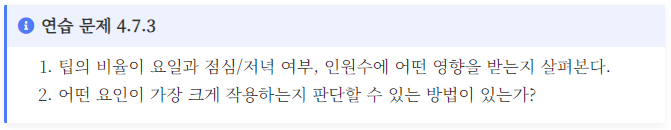

In [303]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [315]:
def diff(x):
    d=tips.groupby(x)[['tip_pct']].mean()
    print(f'### Factor {x} ###')
    print(d)
    print(f"Max Effect : {d.max()/d.min()}")

diff('day')
diff('time')
diff('size')

### Factor day ###
       tip_pct
day           
Thur  0.161276
Fri   0.169913
Sat   0.153152
Sun   0.166897
Max Effect : tip_pct    1.109443
dtype: float64
### Factor time ###
         tip_pct
time            
Lunch   0.164128
Dinner  0.159518
Max Effect : tip_pct    1.0289
dtype: float64
### Factor size ###
       tip_pct
size          
1     0.217292
2     0.165719
3     0.152157
4     0.145949
5     0.141495
6     0.156229
Max Effect : tip_pct    1.535682
dtype: float64


C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2139948059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d=tips.groupby(x)[['tip_pct']].mean()
C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\2139948059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d=tips.groupby(x)[['tip_pct']].mean()


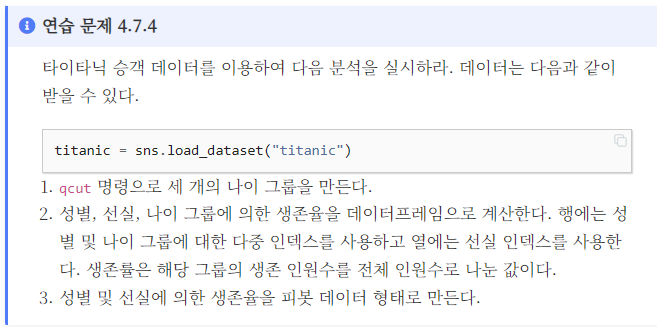

In [337]:
titanic = sns.load_dataset("titanic")

In [356]:
meanage = titanic.age.mean()
titanic['age'] = titanic[['age']].fillna(meanage)


In [357]:
titanic['age_group'] = pd.qcut(titanic.age, 3, labels=['소', '중', '대']).astype(str)
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,소
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,대
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,중
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,대
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,대


In [358]:
def alive(x):
    return x.sum() / len(titanic)

titanic.groupby(['sex', 'age_group', 'class']).survived.agg(alive).unstack('class')

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1382947741.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'age_group', 'class']).survived.agg(alive).unstack('class')


class                First    Second     Third
sex    age_group                              
female 대          0.052750  0.029181  0.005612
       소          0.029181  0.031425  0.037037
       중          0.020202  0.017957  0.038159
male   대          0.029181  0.004489  0.008979
       소          0.007856  0.011223  0.022447
       중          0.013468  0.003367  0.021324

In [359]:

titanic.groupby(['sex', 'class']).survived.agg(alive).unstack('class')

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1249351497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class']).survived.agg(alive).unstack('class')


class,First,Second,Third
sex,,,
female,0.102132,0.078563,0.080808
male,0.050505,0.019080,0.052750


# 4.8 시계열 자료 다루기
### DatetimeIndex 인덱스
- pd.to_datetime 함수: 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성한다.
- pd.date_range 함수: 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.

In [361]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [362]:
pd.date_range(start="2018-4-1", periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

freq 인수로 특정한 날짜만 생성되도록 할 수도 있다. 많이 사용되는 freq 인수값은 다음과 같다.

s: 초

T: 분

H: 시간

D: 일(day)

B: 주말이 아닌 평일

W: 주(일요일)

W-MON: 주(월요일)

M: 각 달(month)의 마지막 날

MS: 각 달의 첫날

BM: 주말이 아닌 평일 중에서 각 달의 마지막 날

BMS: 주말이 아닌 평일 중에서 각 달의 첫날

WOM-2THU: 각 달의 두번째 목요일

Q-JAN: 각 분기의 첫달의 마지막 날

Q-DEC: 각 분기의 마지막 달의 마지막 날


In [363]:
pd.date_range("2018-4-1", "2018-4-30", freq="B")

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

### shift 연산
날짜 이동 등의 다양한 연산이 가능하다. 


In [364]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2018-1-1", periods=4, freq="M"))
ts

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1470198536.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(np.random.randn(4), index=pd.date_range(


2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: ME, dtype: float64

In [365]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: ME, dtype: float64

In [366]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: ME, dtype: float64

In [367]:
ts.shift(1, freq="M")

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1004101146.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(1, freq="M")


2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: ME, dtype: float64

In [368]:
ts.shift(1, freq="W")

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

### resample 연산
시간 간격을 재조정하는 리샘플링(resampling)이 가능하다. 

이 때 시간 구간이 작아지면 데이터 양이 증가한다고 해서 업-샘플링(up-sampling)이라 하고 시간 구간이 커지면 데이터 양이 감소한다고 해서 다운-샘플링(down-sampling)이라 부른다.

In [369]:
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2018-1-1", periods=100, freq="D"))
ts.tail(20)

2018-03-22    1.488252
2018-03-23    1.895889
2018-03-24    1.178780
2018-03-25   -0.179925
2018-03-26   -1.070753
2018-03-27    1.054452
2018-03-28   -0.403177
2018-03-29    1.222445
2018-03-30    0.208275
2018-03-31    0.976639
2018-04-01    0.356366
2018-04-02    0.706573
2018-04-03    0.010500
2018-04-04    1.785870
2018-04-05    0.126912
2018-04-06    0.401989
2018-04-07    1.883151
2018-04-08   -1.347759
2018-04-09   -1.270485
2018-04-10    0.969397
Freq: D, dtype: float64

다운-샘플링의 경우에는 원래의 데이터가 그룹으로 묶이기 때문에 그룹바이(groupby)때와 같이 그룹 연산을 해서 대표값을 구해야 한다.

In [370]:
ts.resample('W').mean()

2018-01-07    0.305776
2018-01-14    0.629064
2018-01-21   -0.006910
2018-01-28    0.277065
2018-02-04   -0.144972
2018-02-11   -0.496299
2018-02-18   -0.474473
2018-02-25   -0.201222
2018-03-04   -0.775142
2018-03-11    0.052868
2018-03-18   -0.450379
2018-03-25    0.601892
2018-04-01    0.334893
2018-04-08    0.509605
2018-04-15   -0.150544
Freq: W-SUN, dtype: float64

In [371]:
ts.resample('M').first()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1581405763.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample('M').first()


2018-01-31    1.867558
2018-02-28    0.156349
2018-03-31   -1.726283
2018-04-30    0.356366
Freq: ME, dtype: float64

날짜가 아닌 시/분 단위에서는 구간위 왼쪽 한계값(가장 빠른 값)은 포함하고 오른쪽 한계값(가장 늦은 값)은 포함하지 않는다. 

즉, 가장 늦은 값은 다음 구간에 포함된다. 예를 들어 10분 간격으로 구간을 만들면 10의 배수가 되는 시각은 구간의 시작점이 된다.

In [372]:
ts = pd.Series(np.random.randn(60), index=pd.date_range(
    "2018-1-1", periods=60, freq="T"))
ts.head(20)

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1446839026.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts = pd.Series(np.random.randn(60), index=pd.date_range(


2018-01-01 00:00:00   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:10:00   -0.268003
2018-01-01 00:11:00    0.802456
2018-01-01 00:12:00    0.947252
2018-01-01 00:13:00   -0.155010
2018-01-01 00:14:00    0.614079
2018-01-01 00:15:00    0.922207
2018-01-01 00:16:00    0.376426
2018-01-01 00:17:00   -1.099401
2018-01-01 00:18:00    0.298238
2018-01-01 00:19:00    1.326386
Freq: min, dtype: float64

In [373]:
ts.resample('10T').sum()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\4170577731.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.resample('10T').sum()


2018-01-01 00:00:00    6.835324
2018-01-01 00:10:00    3.764630
2018-01-01 00:20:00    0.776495
2018-01-01 00:30:00   -0.538336
2018-01-01 00:40:00    1.828234
2018-01-01 00:50:00    0.167957
Freq: 10min, dtype: float64

ohlc 메서드는 구간의 시고저종(open, high, low, close)값을 구한다.

In [374]:
ts.resample('5T').ohlc()

C:\Users\kingm\AppData\Local\Temp\ipykernel_5744\1835478426.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.resample('5T').ohlc()


,open,high,low,close
2018-01-01 00:00:00,-1.173123,1.943621,-1.173123,1.922942
2018-01-01 00:05:00,1.480515,1.910065,-0.861226,1.910065
2018-01-01 00:10:00,-0.268003,0.947252,-0.268003,0.614079
2018-01-01 00:15:00,0.922207,1.326386,-1.099401,1.326386
2018-01-01 00:20:00,-0.694568,1.849264,-0.694568,0.672295
2018-01-01 00:25:00,0.407462,0.539249,-0.769916,0.031831
2018-01-01 00:30:00,-0.635846,0.676433,-0.635846,0.396007
2018-01-01 00:35:00,-1.093062,0.635031,-1.491258,0.635031
2018-01-01 00:40:00,2.383145,2.383145,-1.315907,-1.315907
2018-01-01 00:45:00,-0.461585,1.713343,-0.826439,-0.826439


업-샘플링의 경우에는 실제로 존재하지 않는 데이터를 만들어야 한다. 

이 때는 앞에서 나온 데이터를 뒤에서 그대로 쓰는 forward filling 방식과 

뒤에서 나올 데이터를 앞에서 미리 쓰는 backward filling 방식을 사용할 수 있다. 

각각 ffill, bfill 메서드를 이용한다.

In [375]:
ts.resample('30s').ffill().head(20)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30   -1.173123
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30    1.943621
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.413619
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30   -0.747455
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.922942
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.480515
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    1.867559
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30    0.906045
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30   -0.861226
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30    1.910065
Freq: 30s, dtype: float64

In [376]:
ts.resample('30s').bfill().head(20)

2018-01-01 00:00:00   -1.173123
2018-01-01 00:00:30    1.943621
2018-01-01 00:01:00    1.943621
2018-01-01 00:01:30   -0.413619
2018-01-01 00:02:00   -0.413619
2018-01-01 00:02:30   -0.747455
2018-01-01 00:03:00   -0.747455
2018-01-01 00:03:30    1.922942
2018-01-01 00:04:00    1.922942
2018-01-01 00:04:30    1.480515
2018-01-01 00:05:00    1.480515
2018-01-01 00:05:30    1.867559
2018-01-01 00:06:00    1.867559
2018-01-01 00:06:30    0.906045
2018-01-01 00:07:00    0.906045
2018-01-01 00:07:30   -0.861226
2018-01-01 00:08:00   -0.861226
2018-01-01 00:08:30    1.910065
2018-01-01 00:09:00    1.910065
2018-01-01 00:09:30   -0.268003
Freq: 30s, dtype: float64

### dt 접근자


In [377]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

예를 들어 year, month, day, weekday 등의 속성을 이용하면 년, 월, 일, 요일 정보를 빼낼 수 있다.

In [378]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int32

In [379]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int32

In [382]:
s.dt.strftime('%Y년 %m월 %d일')


0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

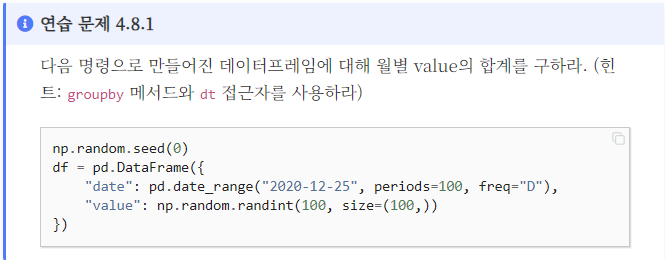

In [383]:
np.random.seed(0)
df = pd.DataFrame({
    "date": pd.date_range("2020-12-25", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))
})

In [384]:
df

,date,value
0,2020-12-25,44
1,2020-12-26,47
2,2020-12-27,64
3,2020-12-28,67
4,2020-12-29,67
...,...,...
95,2021-03-30,23
96,2021-03-31,79
97,2021-04-01,13
98,2021-04-02,85


In [387]:
df['month'] = df.date.dt.month
df.head()

,date,value,month
0,2020-12-25,44,12
1,2020-12-26,47,12
2,2020-12-27,64,12
3,2020-12-28,67,12
4,2020-12-29,67,12


In [390]:
df.groupby('month')['value'].sum()

month
1     1811
2      985
3     1500
4      146
12     381
Name: value, dtype: int32